In [28]:
#https://jtsulliv.github.io/stock-movement/
#http://nbviewer.jupyter.org/github/StuartGordonReid/Python-Notebooks/blob/master/Stochastic%20Process%20Algorithms.ipynb
#http://www.turingfinance.com/random-walks-down-wall-street-stochastic-processes-in-python/
#http://www.math.unl.edu/~sdunbar1/MathematicalFinance/Lessons/BrownianMotion/Definition/definition.pdf
#
import numpy as np
import pandas as pd 
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import datetime 
import requests
from pandas.io.json import json_normalize
import math
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import datetime
from datetime import datetime


In [176]:
## BITCOIN
b=requests.get('https://www.quandl.com/api/v3/datasets/BCHARTS/BITSTAMPUSD')
A=json_normalize(b.json())
data= A['dataset.data'].all()
df = pd.DataFrame(data)
df.columns=A['dataset.column_names'].all()
date=df['Date']
df=df[::-1]
df.index= range(0,len(date))
prices=df[['Date','Close']]
zero_index=np.array(np.where(prices.Close == 0 ))
zero_index=zero_index[0]
prices=prices.drop(list(zero_index))
price_noindex=prices.Close
price_noindex.index=range(0,len(price_noindex))
import datetime
prices['Date']=pd.to_datetime(prices['Date'], format='%Y/%m/%d')
prices.index=prices['Date']
prices=prices[['Close']]
prices.head()
price_noindex

0          5.97
1          5.53
2          5.13
3          4.85
4          4.87
5          4.92
6          4.90
7          5.66
8          5.66
9          5.72
10         5.72
11         5.68
12         6.05
13         4.80
14         4.92
15         4.82
16         4.82
17         4.87
18         4.98
19         4.92
20         4.80
21         4.61
22         3.99
23         3.89
24         4.51
25         4.10
26         3.93
27         3.97
28         4.05
29         3.92
         ...   
2362    8920.79
2363    8547.00
2364    8453.90
2365    8149.66
2366    7791.70
2367    7932.41
2368    7088.38
2369    6850.00
2370    6928.62
2371    6813.52
2372    7052.76
2373    7416.27
2374    6799.95
2375    6771.69
2376    6618.33
2377    6904.90
2378    7027.26
2379    6780.10
2380    6835.67
2381    6940.94
2382    7923.78
2383    7896.92
2384    8000.41
2385    8354.22
2386    8048.15
2387    7890.87
2388    8172.84
2389    8271.31
2390    8861.00
2391    8802.85
Name: Close, Length: 239

<Figure size 2160x720 with 0 Axes>

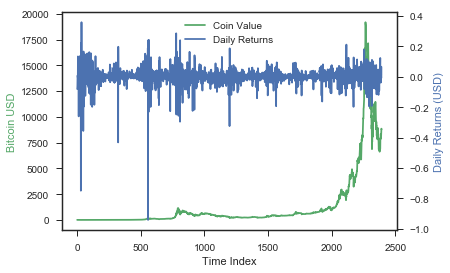

In [171]:
## Focus on the returns from '2015-01-08' (No zero stock values)
def daily_return(close):
    returns = []
    
    for i in range(0, len(close)-1):
        today = close[i+1]
        yesterday = close[i]
        daily_return = (today - yesterday)/today
        returns.append(daily_return)
        
    return returns

returns = daily_return(price_noindex)


# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
fig = plt.figure(figsize=[30, 10])
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
a2=ax2.plot(returns,'b',label = 'Daily Returns')
a1=ax1.plot(price_noindex,'g', label = 'Coin Value')
ax1.set_xlabel('Time Index')
ax1.set_ylabel('Bitcoin USD', color='g')
ax2.set_ylabel('Daily Returns (USD)', color='b')

lns = a1+a2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=9)

plt.show()

mu = np.mean(returns)*len(prices)           # drift coefficient is a result of the overall time period (assume 1 2011-2018)
sig = np.std(returns)*np.sqrt(len(prices))  # diffusion coefficient


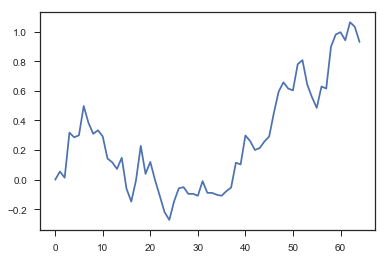

In [120]:
#BROWNIAN MOTION FUNCTION
seed = 5     
N  = 2.**6     # increments

def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b
b = Brownian(seed, N)[1]
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.) 
plt.plot(W)

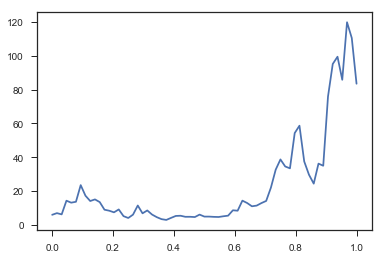

In [108]:
# Parameters

So = prices.loc[datetime.date(2011,9,13)]            # So:     initial stock price
mu                        # mu:     returns (drift coefficient)
sig                       # sigma:  volatility (diffusion coefficient)
T = 1.                    # T:      time period
N = 2**6                # N:      number of increments
seed = 5      
W= Brownian(seed, N)[0]   # W:      brownian motion



def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,N+1)
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t
soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln)


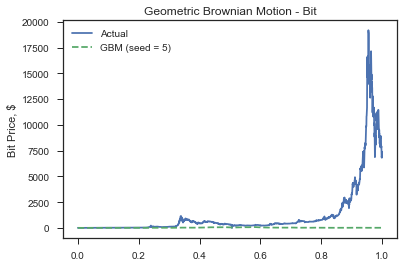

In [39]:
time = np.linspace(1, len(prices), len(prices))
time = [i/2395. for i in time]

plt.plot(time, prices, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 5)', ls='--')

plt.ylabel('Bit Price, $')
plt.title('Geometric Brownian Motion - Bit')

plt.legend(loc = 'upper left')

C:\Users\Edward\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\Edward\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0.5,0,'Time Index')

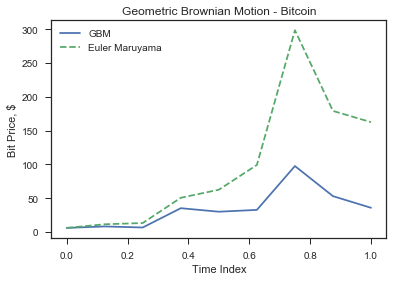

In [213]:
# Exact solution - GBM Model
seed = 5         
W = Brownian(seed, N)[0]
T = 1.
N = 2.**3

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln, label ='GBM')
# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt

b = Brownian(5, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(So, mu, sig, b, T, N, M)[0]

time_EM_1 = np.linspace(0.,1.,L+1)


plt.plot(time_EM_1, EM_approx_1, label = 'Euler Maruyama', ls ='--')

plt.ylabel('Bit Price, $')
plt.title('Geometric Brownian Motion - Bitcoin')

plt.legend(loc = 'upper left')

plt.xlabel('Time Index')
